## 데이터분석에 필요한 라이브러리
- numpy, pandas, matplotlib 세가지가 기본
- 넘파이는 판다스를 이해하기 위해 배운것(딥러닝에서 넘파이가 관여)
- 본격 데이터 분석에 들어갈 수 있다.

# 데이터 분석 순서(KDD 분석 방법론)
1. 데이터 세트 - 불러오기(CSV 등 DB에서 선택)
2. 데이터 전처리: <br> 데이터타입, 결측값, 이상치 탐지, 데이터간 상관관계
3. 데이터 변환(특성추출): 원본에서 새로운 데이터 생성, 삭제, 스케일링( 스케일이 균일해질수 있게 ), 인코딩 (문자에서 숫자로)
4. 데이터 마이닝(모델만들기, 분석): 분석에 적합한 알고리즘 선택, 모델생성, 튜닝
5. 결과 평가: 모델의 성능을 평가 with 테스트데이터를이용.

# 데이터 전처리
- 이전 과정은 판다스에서 진행했기에.
- 데이터 타입 변환
- 결측치 탐지 및 보완
- 이상치 탐지 및 처리
- 데이터 특성 파악 (치우침, 분포 특성)
- 변수들 간의 상관관계 분석
- EDA와도 겹치는점 있음

In [1]:
import pandas as pd
import numpy as np

# 1. 데이터세트 선택 및 로딩
- 로드 후 head,tail로 컬럼과 데이터 파악

In [3]:
data=pd.read_csv("./data/Taitanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [73]:
# 데이터 바뀔 수 있으므로 카피해두기
data1=data.copy()
data2=data.copy()
data3=data.copy()
data4=data.copy()

# 2. 이후 .info로 컬럼명, 결측치, dtype파악
- 전체데이터의 RangeIndex와 다른 값이 결측치
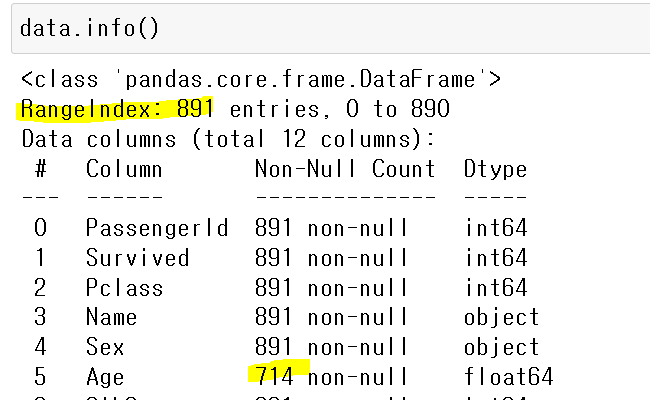
## 데이터가 너무 커서 Non-Null 안보일때 <br>show-counts=True

In [4]:
data.info() # 결측치 확인 후 컬럼명을 통해 Dtype 적절한지 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. describe() 기초통계량, 이상치 파악
- 너무 큰 값이라든지.
- 평균과 중앙값(50%)의 값차이가 클수록 이상있다는것.
- Z스코어/사분위수로 이상치기준

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. isna().sum() <br>결측값 찾고, 비율 보고, 대치/삭제하기
1. 결측값의 비율 계산 ```isna().sum() / len(df) * 100```
    
2. 비율이 어떠한가에 따라 컬럼을 대체/삭제
    
- 5% 미만은 행, 열 제거가능.(결측된 부분을 드롭?)
- 5~30%에 이르면 결측값을 대체하기(Imputation).
    - **대체할 값**
    - 수치형 데이터(나이, 가격, 수량):<br> mean, median, mode(최빈값)
    - 범주형 데이터(탑승지, 선실등급, 문자):<br> mode(최빈값)
- 30~50%에 이를 경우
    - 결측에 대체되는 값을 계산하는 알고리즘<br> 최근접이웃 KNN(K-Nearest Neighbor) sklearn에서 제공하는 imputer,<br> 또는 회기분석을통해 결측값 대체
- 결측값 비율이 50% 이상이라면 컬럼삭제가 타당.
    

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.isna().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# round 함수로 소수점 짧게보기
round(data.isna().sum()/len(data)*100,2)

# 결과를 보고 결측 비율에 따라 대체/삭제.

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## 결측 데이터 종류
- MCAR : 완전 무작위 결측<br> 다른 변수와 무관하게 결측된점 (이유없이 빈 값)
    - 설문조사 중에 일부 항목을 랜덤하게 스킵(시간부족등)
- MAR : 무작위 결측<br> 다른 변수와 영향받아서 결측. 본인과는 무관
    - 설문조사 중에 나이많은 사람들이 소득란을 스킵.나이는 본인나이인데 영향을 준거아닌가...
    - 성별,직업에따라 학력란에 응답하지 않는 경우.
- NMAR : 비무작위 결측<br> 컬럼 스스로에게 원인이있음.
    - 저소득자가 소득란을 스킵
    - 비만인이 체중란을 스킵.
    - 불만족한 사람이 만족도조사를 스킵.
    
**무조건 평균값이나 최빈값으로 대체할수는 없는 요인들도 있음 <br>이런경우 원인 파악 후 방법을 찾아야한다**

# 결측치 처리 방법
## 1) 단순 대치법(simple imputation)<br><br>(1) 완전분석: 결측값이 있는 모든행을 삭제하고 완전한 자료만 분석
- 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우
- 결측값을 삭제한 후에 데이터에 편향이 없을때
- dropna(): 결측값이 있는 모든 행 삭제

In [ ]:
data.dropna()

## (2) 평균대치법: 결측치가 있는 컬럼에서 데이터 평균을 구한 후 결측값을 대체.
- 이상치가 없다면 평균을 이용.
- 이상치 있으면 중앙값이나 최빈값을 이용.
- 평균이 만능은 아님. 이상치 탐지 필수. <br> 예)GDP경우에도 높아도 격차가 심할 수 있음
- 이상치는 삭제해야한다는 사인이아니라 분석할 필요가 있다는 사인이다. <br> 사기탐지의 경우에도 갑작스런 이상치를 잡아내는것.

In [12]:
# 값이 1개만 다른 두 데이터프레임.
a = np.array([24, 5, 10, 34, 20, 18, 28, 20])
b = np.array([24, 5, 10, 34, 20, 18, 28, 2000])

In [13]:
# 평균 - 편차가 심함 이상치에 휘둘리는 편.
print(a.mean())
print(b.mean())

19.875
267.375


In [15]:
# 중앙값 - 편차가 심하지 않음 (평균에 비해)
print(np.median(a))
print(np.median(b))

20.0
22.0


#### Age 컬럼의 결측값에 평균대치법 써보기

In [24]:
data2['Age'].isna().sum() # 얼마나 결측됐는지.

np.int64(177)

In [25]:
# 결측값 있는 행(인덱스)만 모아 담기
age_na_inx=data[data2['Age'].isna()].index 

#### 대체값을 평균을 써도되는지 알아보기.

In [19]:
data['Age'].describe() # 이상치 여부 빠르게 파악하는법
# 평균과 중앙값의 차이가 크지 않고,
# 평균이 최대값의 3분의 1정도에 올때

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
data2['Age']=data2['Age'].fillna(data2['Age'].mean())
data2.loc[age_na_inx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


**중앙값으로 대치 .median()**

In [29]:
data3['Age'].median()

np.float64(28.0)

In [28]:
age_na_inx3= data3[data3['Age'].isna()].index

In [30]:
data3.loc[age_na_inx3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [31]:
data3['Age']=data3['Age'].fillna(data3['Age'].median())

In [32]:
data3.loc[age_na_inx3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


**최빈값으로 대치 ) .mode()**

In [59]:
data1['Age'].isna().sum()

np.int64(177)

In [61]:
age_na_idx=data1[data1['Age'].isna()].index
data1.loc[age_na_idx].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [63]:
data1['Age'].mode() # 대체값 상태가 시리즈일수있음 주의

0    24.0
Name: Age, dtype: float64

In [62]:
data1['Age'].mode()[0]

np.float64(24.0)

In [66]:
data1['Age']=data1['Age'].fillna(data1['Age'].mode()[0])

In [64]:
data1[data1['Age'].isna()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [67]:
data1.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


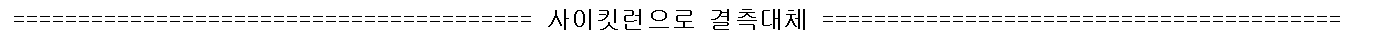

## 사이킷 런 설치
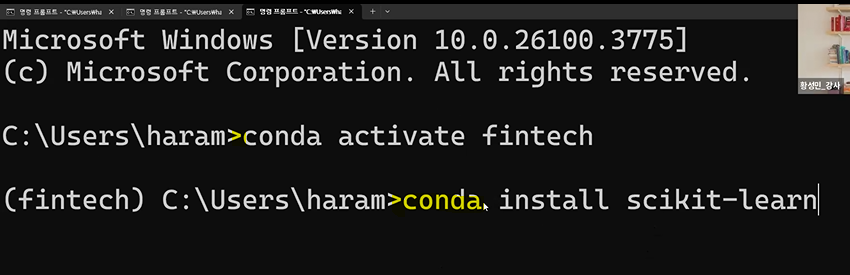

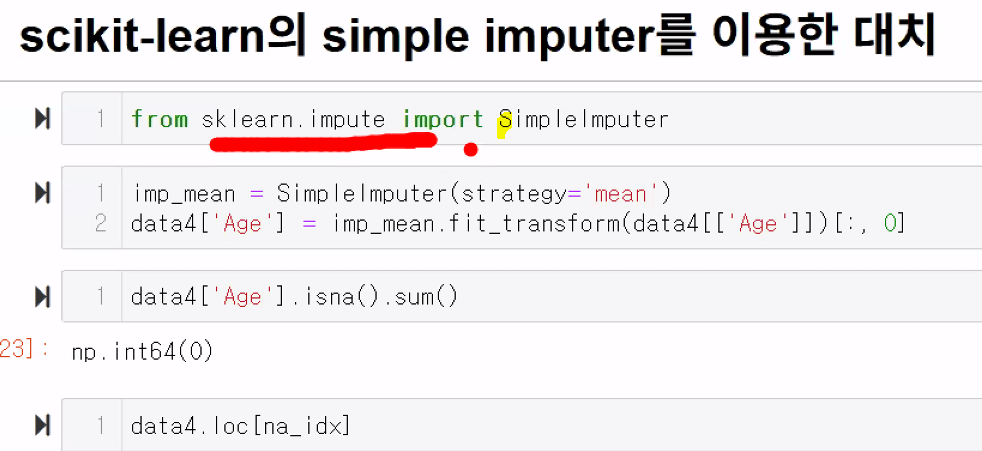
사이킷런 코드 example
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
<br>
fillna()가 더편하지만 KNN임퓨터를 사용할때는 사이킷런

In [68]:
from sklearn.impute import SimpleImputer
# 심플 임퓨터는 클래스 이므로 
# 인스턴스를 만들어야한다.

KNN임퓨터가 평균을 내지는 않으나 주변 5개와 비교해 평균값으로 대치함.
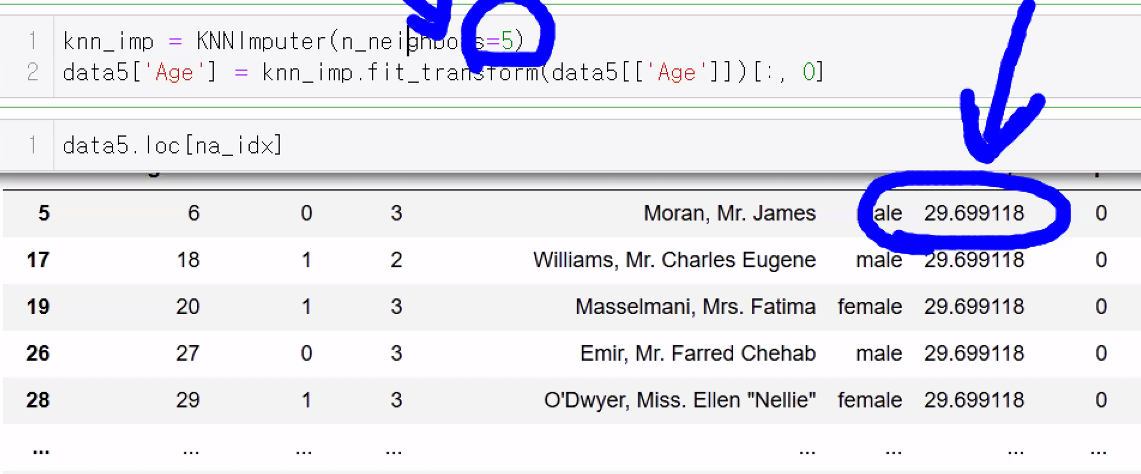

### 생성한 인스턴스 통해서 대체값 조절가능(평균할지 최빈값 할지 등등)
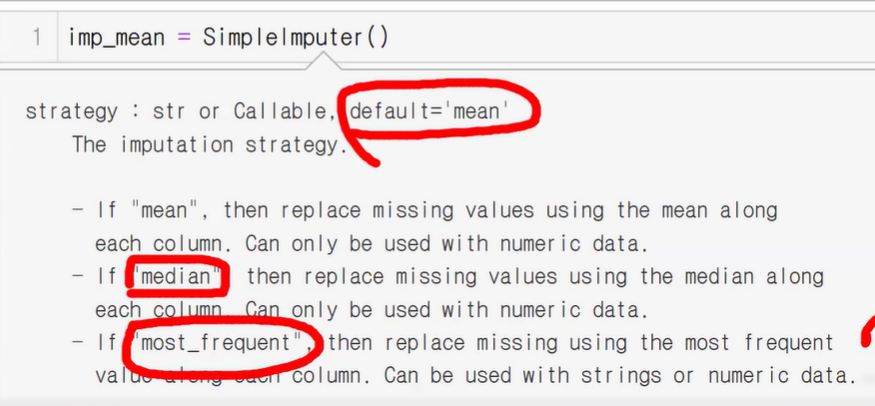
most_frequent가 최빈값

In [71]:
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]
# fit_transform에 컬럼을 지명해야하는이유
# 시리즈를 지원하지 않음
# values와 슬라이싱 통해서 내용물 까주기.

# reshape 안쓰는 코드
#imp_mean.fit_transform(data[['Age']])[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [74]:
# Age 결측값에 평균값을 넣는중 (fillna와 같은역할)
data4['Age']=imp_mean.fit_transform(data4[['Age']])[:,0]

In [76]:
data4['Age'].isna().sum()

np.int64(0)

### 이번에는 중앙값으로 대체해보기

In [77]:
data3['Age'].isna().sum()

np.int64(177)

In [82]:
age_na_idx3=data3[data3['Age'].isna()].index

In [84]:
data3.loc[age_na_idx3].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [85]:
imp_median=SimpleImputer(strategy='median')
data3['Age']=imp_median.fit_transform(data3[['Age']])[:,0]

In [86]:
data3.loc[age_na_idx3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


## 최빈값

In [87]:
imp_mode=SimpleImputer(strategy='most_frequent')
data1['Age']=imp_mode.fit_transform(data1[['Age']])[:,0]

In [88]:
data1.loc[age_na_idx3] # 엥 다른 카피에서 가져온 키로도 조회가 된다는게 신기~

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


결측값 대치할때) 사이킷런의 심플임퓨터로 실행해보았음. 심플임퓨터 핏_트랜스폼 
스탠다드스케일러(컬럼간 단위가 다를때 단위맞추기)
문자를 숫자로 변환해주는 레이블인코더역할도
핏_트랜스폼으로 가능.
(심플 임퓨트를 쓰면서 생성되는 객체를 트랜스폼을 통해 넘파이어레이로 변환함)

## KNN최근접이웃 실습
- 결측율이 30~50% 일때 씀.
- 이웃의 수가 중요
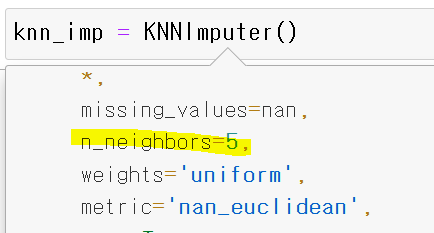
<br>
<br>
- n_네이버스가 중요해지는 이유<br>
범위(k)가 넓어지면서 노란데이터가 많아지면 결측값도 노란색이라고 판단하는것.<br>
알이하나 나왔는데 주변에 닭이더 많으면 병아리, 오리가 더 많으면 오리새끼일거라고 생각하는것.

In [90]:
data5=data.copy()

In [92]:
data5.isna().sum() # 결측값 있는 df 하나더 생성

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
from sklearn.impute import KNNImputer

In [96]:
knn_imp = KNNImputer(n_neighbors=5)
data5['Age']=knn_imp.fit_transform(data5[['Age']])[:,0]

In [97]:
data5.loc[age_na_idx3].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S


# 깊은 복사, 얕은 복사 ★
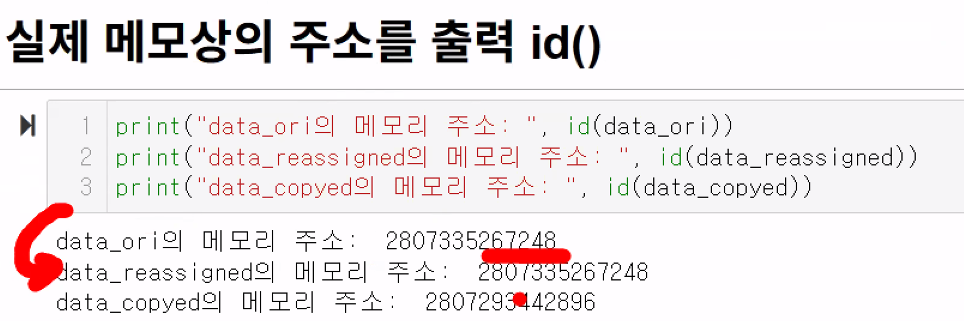
메모리상 주소가 같고 다르고의 차이 <br>
- 얕은복사: 실제 메모리 주소는 같음
- 깊은 복사:
- 원본을 보존하면서 작업해야하는 상황일 때 불리할 수 있음
- 

In [103]:
# 깊은복사 원본(data)를 copy()를 이용해서 복사
data_copyed=data.copy()

# 얕은복사 - 원본(data)을 다른 변수에 재할당
data_reassigned=data

얕은복사는 위와같이 재할당하더라도 <br>같은메모리를 씀 원본에 영향줌.<br>
**깊은복사는 메모리를 따로 할당**해서 원본에 영향주지 않음.
####  id() 메모리상의 주소보여줌
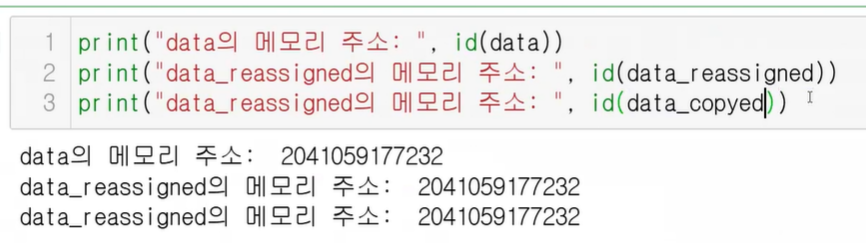
변수명 바꿔서 카피해도 같은 메모리를 씀.<br>
깊은복사는 메모리사용량이 커짐.

In [105]:
new_df=data_copyed[['Survived','Pclass','Name']]
print("data_copyed:", id(data_copyed))
print("new_df:", id(new_df))

data_copyed: 2209840432944
new_df: 2209867842128


In [108]:
# 깊은 복사가 된점 
loc_result=data_copyed.loc[data_copyed['Age']>50,['Name','Age']]
slice_result=data_copyed[data_copyed['Age']>50][['Name','Age']]

In [111]:
print("data_copyed:", id(data_copyed))
print("loc_result:", id(loc_result))
print("slice_result:", id(slice_result))

data_copyed: 2209840432944
loc_result: 2209870365888
slice_result: 2209824341200


In [113]:
# 결측비율 자체가 50이 넘어간 컬럼
data5.isna().sum() / len(data5) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

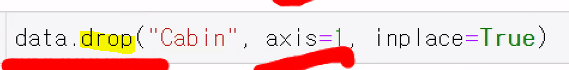
드롭할때는 행이아니라 열(axis=1)이라고 지정해줘야함

In [115]:
data5.drop('Cabin', axis=1)
# 드롭은 수동할당. inplace=True로 바로할당가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## 카테고리 변수의 경우 최빈값.mode()를 이용해 결측값
문자의 평균은 없으므로.
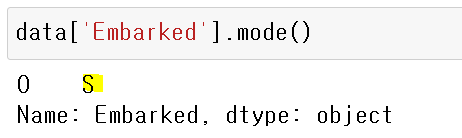

In [127]:
embk_na_idx=data2[data2['Embarked'].isna()].index
data.loc[embk_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [125]:
data2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [126]:
data2['Embarked'].mode()[0]

'S'

In [119]:
data['Embarked'] =data['Embarked'].fillna(data['Embarked'].mode()[0])

In [128]:
data.loc[embk_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [129]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

데이터 종류 굳이 바꿀필요없어서 안했음. 나머지과정은 했음.